In [47]:
# Import required Packages ( Add all package import here)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
%pwd

'C:\\Users\\nidhi\\Desktop\\CIS8005-DataProgramming\\TermProject'

## Read dataset

In [49]:
# Read dataset
df_HRData = pd.read_csv("HR_Data.csv", header = 0)
df_HRData

,enrollee_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,JobChange
0,8949,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,29725,city_40,0.776,Male,No relevant experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,NaN,No relevant experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0
3,33241,city_115,0.789,NaN,No relevant experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1
4,666,city_162,0.767,Male,Has relevant experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19188,394,city_73,0.754,NaN,Has relevant experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,1,29,0
19189,7683,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,5,NaN,NaN,1,10,1
19190,22849,city_116,0.743,NaN,Has relevant experience,no_enrollment,NaN,NaN,NaN,50-99,Pvt Ltd,never,12,0
19191,17189,city_21,0.624,Male,Has relevant experience,no_enrollment,Graduate,STEM,7,10000+,Pvt Ltd,4,43,1


## Look for null values in dataset

In [6]:
df_HRData.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4519
relevant_experience          0
enrolled_university        386
education_level            462
major_discipline          2817
experience                  66
company_size              5953
company_type              6151
last_new_job               424
training_hours               0
JobChange                    0
dtype: int64

In [7]:
df_HRData.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevant_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
JobChange                   int64
dtype: object

## PRE PROCESSING ( CLEAN/ TRANSFORM DATA AS REQUIRED)

In [8]:
# Look for unique values in "Company_size" column
print(df_HRData.company_size.unique())

# Look for unique values in "last_new_job" column
print(df_HRData.last_new_job.unique())

# Look for unique values in "experience" column
print(df_HRData.experience.unique())

[nan '50-99' '<10' '10000+' '5000-9999' '1000-4999' 'Oct-49' '100-500'
 '500-999']
['1' '>4' 'never' '4' '3' '2' nan]
['>20' '15' '5' '<1' '11' '13' '7' '17' '2' '16' '1' '4' '10' '14' '18'
 '19' '12' '3' '6' '9' '8' '20' nan]


## TRANSFORM values in company_size, last_new_job and experience columns 

In [9]:
df_HRData['company_size'] = df_HRData.company_size.replace({"50-99":50,"<10":10,"10000+":10000,"5000-9999":5000,\
                                                           "1000-4999":1000,"Oct-49":25,"100-500":100,"500-999":500})
df_HRData.company_size = df_HRData.company_size.fillna(0)
df_HRData.company_size = df_HRData.company_size.astype('int64')

df_HRData['last_new_job'] = df_HRData.last_new_job.replace({">4":5,"never":0})
df_HRData.last_new_job = df_HRData.last_new_job.fillna(10)
df_HRData.last_new_job = df_HRData.last_new_job.astype('int64')

# Replace with proper values
df_HRData['experience'] = df_HRData.experience.replace({'>20':21,"<1":0})
df_HRData.experience = df_HRData.experience.fillna(50)
df_HRData.experience = df_HRData.experience.astype('int64')

##  Filling all possible NaN values with "No Answer" instead of removing them

In [10]:
df_HRData.gender = df_HRData.gender.fillna("No Answer")
df_HRData.education_level = df_HRData.education_level.fillna("No Answer")
df_HRData.major_discipline = df_HRData.major_discipline.fillna("No Answer")
df_HRData.company_type = df_HRData.company_type.fillna("No Answer")
df_HRData.enrolled_university = df_HRData.enrolled_university.fillna("No Answer")

In [11]:
print(df_HRData.gender.unique())
print(df_HRData.education_level.unique())
print(df_HRData.major_discipline.unique())
print(df_HRData.company_type.unique())
print(df_HRData.enrolled_university.unique())
print(df_HRData.company_size.unique())
print(df_HRData.training_hours.unique())
print(df_HRData.last_new_job.unique())

['Male' 'No Answer' 'Female' 'Other']
['Graduate' 'Masters' 'High School' 'No Answer' 'Phd' 'Primary School']
['STEM' 'Business Degree' 'No Answer' 'Arts' 'Humanities' 'No Major'
 'Other']
['No Answer' 'Pvt Ltd' 'Funded Startup' 'Early Stage Startup' 'Other'
 'Public Sector' 'NGO']
['no_enrollment' 'Full time course' 'No Answer' 'Part time course']
[    0    50    10 10000  5000  1000    25   100   500]
[ 36  47  83  52   8  24  18  46 123  32 108  23  26 106   7 132  68  50
  48  65  13  22 148  72  40 141  82 145 206 152  42  14 112  87  20  21
  92 102  43  45  19  90  25  15  98 142  28 228  29  12  17  35   4 136
  27  74  86  75 332 140 182 172  33  34 150 160   3   2 210 101  59 260
 131 109  70  51  60 164 290 133  76 156 120 100  39  55  49   6 125 326
 198  11  41 114 246  81  31  84 105  38 178 104 202  88 218  62  10  80
  77  37 162 190  30  16   5  54  44 110 262 107 134 103  96  57 240  94
 113  56  64 320   9 129  58 126 166  95  97 204 116 161 146 302  53 143
 124 214 

In [12]:
df_HRData.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevant_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                  int64
company_size                int64
company_type               object
last_new_job                int64
training_hours              int64
JobChange                   int64
dtype: object

In [13]:
# Look for null values and NaN values in dataset
df_HRData.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevant_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
JobChange                 0
dtype: int64

## DROPPING ENROLLEE ID AS ITS NOT REQUIRED

In [14]:
df_HRData = df_HRData.drop(columns = ['enrollee_id'])

## DATA ANALYSIS

In [50]:
df_HRData.describe()

,enrollee_id,city_development_index,training_hours,JobChange
count,19193.000000,19193.000000,19193.000000,19193.000000
mean,16875.898088,0.828784,65.341062,0.249622
std,9614.793138,0.123378,60.035849,0.432806
min,1.000000,0.448000,1.000000,0.000000
25%,8560.000000,0.740000,23.000000,0.000000
50%,16982.000000,0.903000,47.000000,0.000000
75%,25169.000000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [16]:
# Check remaining count
df_HRData.count()

city                      19193
city_development_index    19193
gender                    19193
relevant_experience       19193
enrolled_university       19193
education_level           19193
major_discipline          19193
experience                19193
company_size              19193
company_type              19193
last_new_job              19193
training_hours            19193
JobChange                 19193
dtype: int64

In [17]:
df_HRData

,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,JobChange
0,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,21,0,No Answer,1,36,1
1,city_40,0.776,Male,No relevant experience,no_enrollment,Graduate,STEM,15,50,Pvt Ltd,5,47,0
2,city_21,0.624,No Answer,No relevant experience,Full time course,Graduate,STEM,5,0,No Answer,0,83,0
3,city_115,0.789,No Answer,No relevant experience,No Answer,Graduate,Business Degree,0,0,Pvt Ltd,0,52,1
4,city_162,0.767,Male,Has relevant experience,no_enrollment,Masters,STEM,21,50,Funded Startup,4,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19188,city_73,0.754,No Answer,Has relevant experience,Full time course,Graduate,STEM,5,50,Pvt Ltd,1,29,0
19189,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,5,0,No Answer,1,10,1
19190,city_116,0.743,No Answer,Has relevant experience,no_enrollment,No Answer,No Answer,50,50,Pvt Ltd,0,12,0
19191,city_21,0.624,Male,Has relevant experience,no_enrollment,Graduate,STEM,7,10000,Pvt Ltd,4,43,1


## Exploratory Data Analysis - 1 with respect to education level 

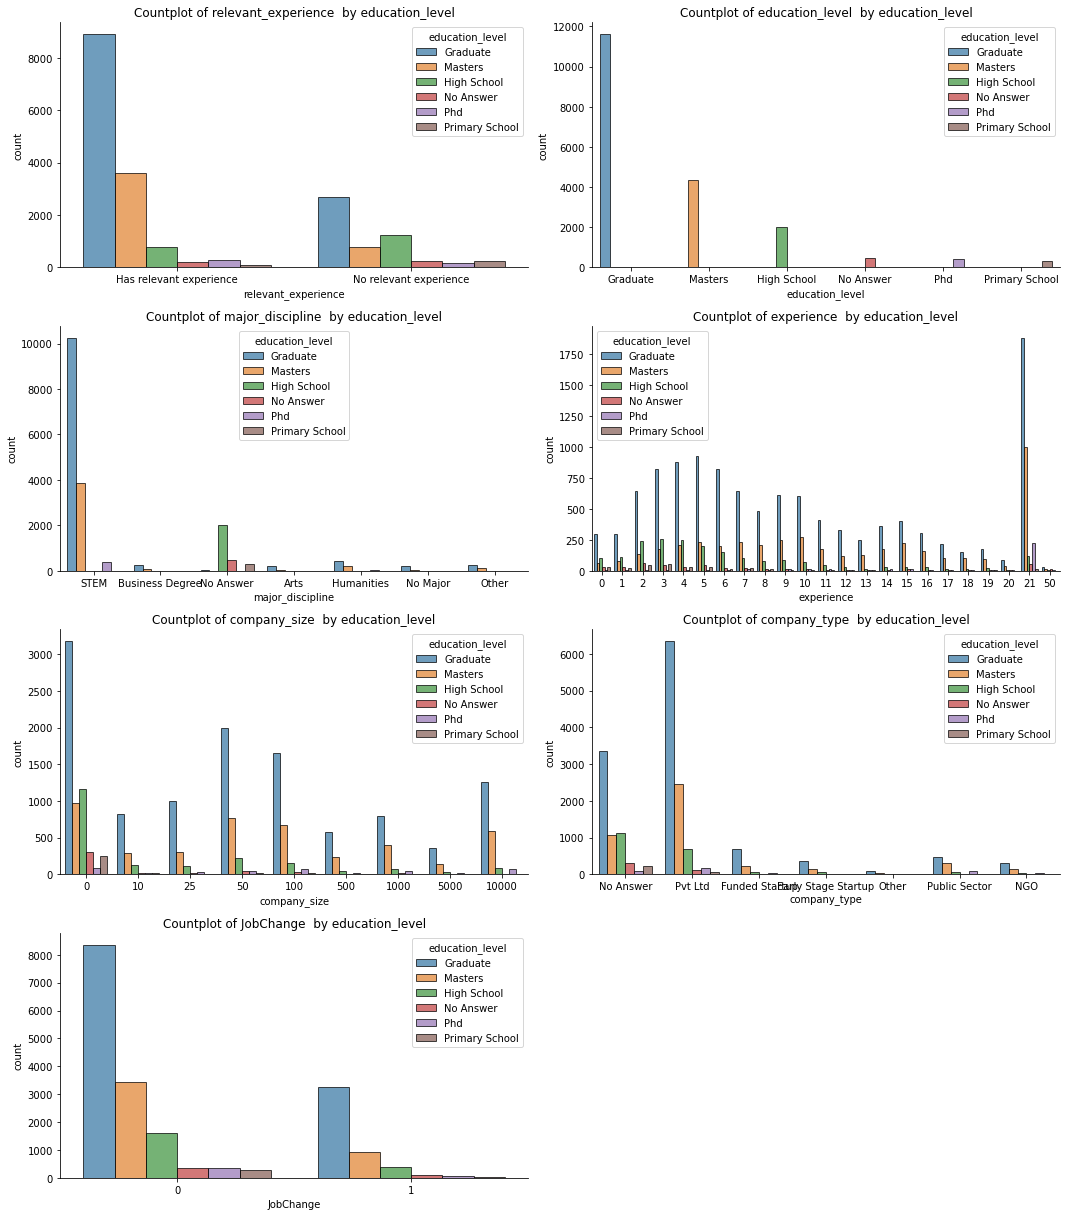

In [18]:

import matplotlib.pyplot as plt
import seaborn as sns
#Countplots showing the frequency of each category with respect to education level 
plt.figure(figsize=[15,17])
plot=["relevant_experience", "education_level","major_discipline", "experience","company_size","company_type", "JobChange"]
n=1
for f in plot:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='education_level', edgecolor="black", alpha=0.7, data=df_HRData)
    sns.despine()
    plt.title("Countplot of {}  by education_level".format(f))
    n=n+1
plt.tight_layout()
plt.show()

## Exploratory Data Analysis - 2 with respect to Job Change

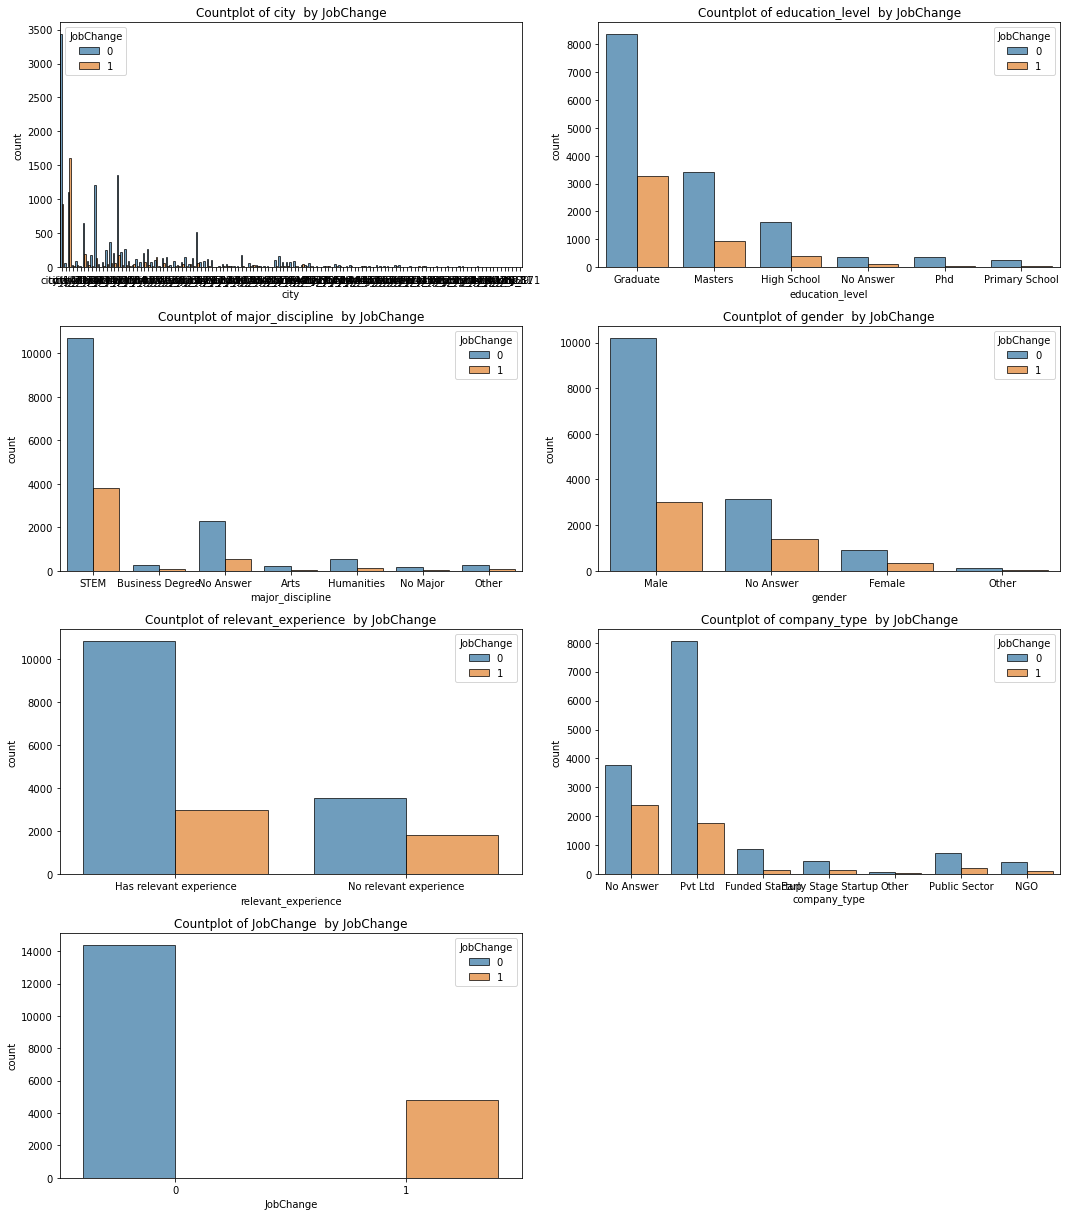

In [19]:
# Exploratory Data Analysis - 2
import matplotlib.pyplot as plt
import seaborn as sns
#Countplots showing the frequency of each category with respect to JobChange
plt.figure(figsize=[15,17])
plot=["city", "education_level","major_discipline", "gender","relevant_experience","company_type", "JobChange"]
n=1
for f in plot:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='JobChange', edgecolor="black", alpha=0.7, data=df_HRData)
    #sns.despine()
    plt.title("Countplot of {}  by JobChange".format(f))
    n=n+1
plt.tight_layout()
plt.show()

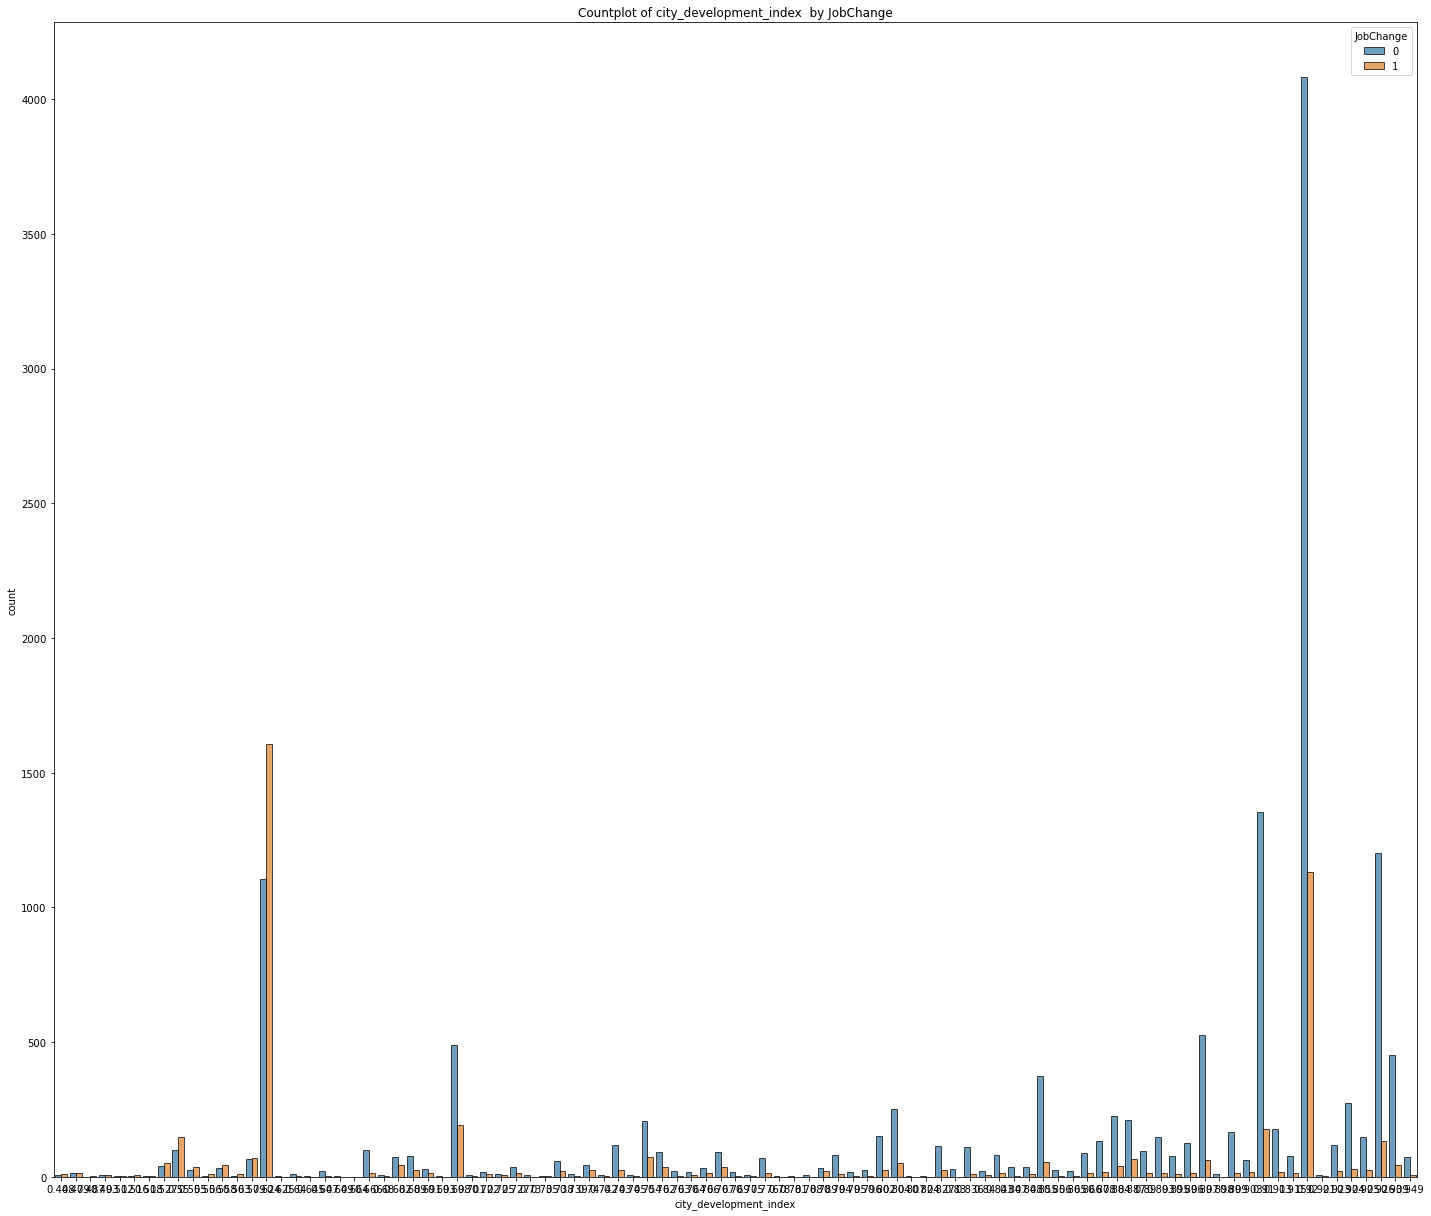

In [20]:
# Exploratory Data Analysis - 3 ( CITY DEV INDEX vs JOB CHANGE)
import matplotlib.pyplot as plt
import seaborn as sns
#Countplots showing the frequency of each category with respect to JobChange
plt.figure(figsize=[20,17])
plot=["city_development_index"]
n=1
for f in plot:
    #plt.subplot(4,2,n)
    sns.countplot(x=f, hue='JobChange', edgecolor="black", alpha=0.7, data=df_HRData)
    #sns.despine()
    plt.title("Countplot of {}  by JobChange".format(f))
    n=n+1
plt.tight_layout()
plt.show()

# Label Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder   
le = LabelEncoder()

In [22]:
df_HRData.city = le.fit_transform(df_HRData.city)
df_HRData.gender = le.fit_transform(df_HRData.gender)
df_HRData.relevant_experience = le.fit_transform(df_HRData.relevant_experience)
df_HRData.enrolled_university = le.fit_transform(df_HRData.enrolled_university)
df_HRData.education_level = le.fit_transform(df_HRData.education_level)
df_HRData.major_discipline = le.fit_transform(df_HRData.major_discipline)
df_HRData.company_type = le.fit_transform(df_HRData.company_type)
df_HRData.last_new_job = le.fit_transform(df_HRData.last_new_job)

In [23]:
df_HRData.dtypes

city                        int32
city_development_index    float64
gender                      int32
relevant_experience         int32
enrolled_university         int32
education_level             int32
major_discipline            int32
experience                  int64
company_size                int64
company_type                int32
last_new_job                int64
training_hours              int64
JobChange                   int64
dtype: object

## Train Test Split

In [24]:
from sklearn.model_selection import train_test_split
X = df_HRData.iloc[:, : -1]
y = df_HRData.JobChange
X_train, X_test, y_train, y_test = \
    train_test_split(X,y, test_size=0.40, random_state=35)
print(y_test.unique())
print(y_train.unique())

[0 1]
[0 1]


In [25]:
X_train

,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
17146,95,0.855,1,1,0,3,3,2,0,3,0,87
14442,103,0.939,0,1,3,0,2,8,25,2,5,74
9735,48,0.910,1,0,3,0,0,21,0,3,5,27
4878,5,0.920,1,0,3,0,6,6,10000,6,1,70
4585,95,0.855,1,0,3,2,6,15,10000,6,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...
15808,116,0.698,1,1,3,2,6,13,0,3,3,37
15393,101,0.754,2,0,3,2,3,50,50,6,6,5
9143,5,0.920,2,0,3,0,2,21,0,3,5,42
17679,48,0.910,1,1,0,1,3,9,0,3,1,79


### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model_log = LogisticRegression()
model_log.fit(X_train,y_train)
y_predict = model_log.predict(X_test)
y_predict

C:\Users\nidhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
accuracy_score(y_test,y_predict)

0.7504558478770513

In [28]:
pd.crosstab(y_test,y_predict)

col_0,0,1
JobChange,,
0,5657,108
1,1808,105


In [29]:
from sklearn.metrics import classification_report

In [30]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.76      0.98      0.86      5765
           1       0.49      0.05      0.10      1913

    accuracy                           0.75      7678
   macro avg       0.63      0.52      0.48      7678
weighted avg       0.69      0.75      0.67      7678



In [31]:
from sklearn.feature_selection import RFE
rfe=RFE(model_log,n_features_to_select=4)
rfe.fit(X_test,y_test)
rfe.ranking_
z_log=pd.DataFrame()
z_log['Features']=X_test.columns
z_log['Importance_Rank']=rfe.ranking_
z_log.index.name='Index'
z_log=z_log.sort_values(ascending=True,by='Importance_Rank')
z_log

C:\Users\nidhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nidhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

,Features,Importance_Rank
Index,,
1,city_development_index,1
3,relevant_experience,1
5,education_level,1
9,company_type,1
4,enrolled_university,2
6,major_discipline,3
10,last_new_job,4
7,experience,5
2,gender,6


## Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train)
y_predict = model_rf.predict(X_test)
y_predict

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [33]:
pd.crosstab(y_test,y_predict)

col_0,0,1
JobChange,,
0,5115,650
1,1019,894


In [34]:
accuracy_score(y_test,y_predict)         

0.7826256837718156

In [35]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      5765
           1       0.58      0.47      0.52      1913

    accuracy                           0.78      7678
   macro avg       0.71      0.68      0.69      7678
weighted avg       0.77      0.78      0.77      7678



In [36]:
pd.DataFrame({'Variable':X_train.columns,
              'Importance':model_rf.feature_importances_}).sort_values('Importance', ascending=False)

,Variable,Importance
11,training_hours,0.210131
1,city_development_index,0.180159
7,experience,0.129411
0,city,0.098860
8,company_size,0.096815
10,last_new_job,0.071627
9,company_type,0.049495
5,education_level,0.041023
2,gender,0.039071
4,enrolled_university,0.031923


## KNN IMPLEMENTATION

In [37]:
# Trying KNN with K = 3 ( just some K value) 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)

print(knn.predict(X_test))
y_predict = knn.predict(X_test)

[0 0 0 ... 0 0 0]


In [38]:
# Find out prediction accuracy
print(knn.score(X_test, y_test))

0.7537119041417035


In [39]:
pd.crosstab(y_test,y_predict)

col_0,0,1
JobChange,,
0,5266,499
1,1392,521


In [40]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85      5765
           1       0.51      0.27      0.36      1913

    accuracy                           0.75      7678
   macro avg       0.65      0.59      0.60      7678
weighted avg       0.72      0.75      0.73      7678



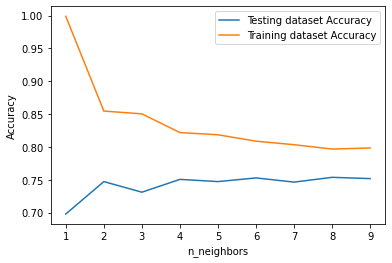

In [41]:
# Trying to find out optimal value of K

import matplotlib.pyplot as plt
neighbors = np.arange(1, 10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
     
    # Training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
 
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [42]:
from sklearn.inspection import permutation_importance
# perform permutation importance
results = permutation_importance(knn, X_test, y_test, scoring='accuracy')
# get importance
importance = results.importances_mean
importance
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.04142
Feature: 1, Score: 0.00044
Feature: 2, Score: 0.00008
Feature: 3, Score: -0.00018
Feature: 4, Score: -0.00128
Feature: 5, Score: 0.00354
Feature: 6, Score: 0.00526
Feature: 7, Score: 0.00555
Feature: 8, Score: 0.03790
Feature: 9, Score: 0.00154
Feature: 10, Score: -0.00003
Feature: 11, Score: 0.00146


## CATEGORICAL NAIVE BAYES

In [43]:
from sklearn.naive_bayes import CategoricalNB
cnb = CategoricalNB()
cnb.fit(X_train,y_train)
    
y_pred = cnb.predict(X_test)

In [44]:
# Confusion Matrix and prediction accuracy of CNB
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[5254  511]
 [1328  585]]
0.7604845011721802


In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      5765
           1       0.53      0.31      0.39      1913

    accuracy                           0.76      7678
   macro avg       0.67      0.61      0.62      7678
weighted avg       0.73      0.76      0.74      7678



In [46]:
from sklearn.inspection import permutation_importance
# perform permutation importance
results = permutation_importance(cnb, X_test, y_test, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.02334
Feature: 1, Score: 0.00000
Feature: 2, Score: -0.00047
Feature: 3, Score: -0.00177
Feature: 4, Score: -0.00010
Feature: 5, Score: 0.00518
Feature: 6, Score: 0.00313
Feature: 7, Score: 0.00096
Feature: 8, Score: -0.00044
Feature: 9, Score: -0.00227
Feature: 10, Score: -0.00349
Feature: 11, Score: 0.00042


## RANDOM FOREST WITH SMOTE

In [60]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
y_train.value_counts()    #biased towards 0 
y_train_smote

import collections
target_count = collections.Counter(y_train_smote)
print('no of 0 in y_train_smote :',target_count[0])
print('no of 1 in y_train_smote :',target_count[1]) 

no of 0 in y_train_smote : 8637
no of 1 in y_train_smote : 8637


In [57]:
model_rf_smote = RandomForestClassifier(n_estimators=200)
model_rf_smote.fit(X_train_smote,y_train_smote)
y_predict = model_rf_smote.predict(X_test)

In [58]:
accuracy_score(y_test,y_predict)        
pd.crosstab(y_test,y_predict)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      5765
           1       0.54      0.58      0.56      1913

    accuracy                           0.77      7678
   macro avg       0.70      0.71      0.70      7678
weighted avg       0.78      0.77      0.77      7678

